In [1]:
# import sys
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
df_movies=pd.read_csv('/home/csc/my_first_environment/Movie_Recommend/movies.dat', sep="::",names=["MovieID","Title","Genres"],engine='python',encoding='latin-1',header=None,skiprows=1)
df_movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df_ratings=pd.read_csv('/home/csc/my_first_environment/Movie_Recommend/ratings.dat', sep="::",names=["UserID","MovieID","Rating","Timestamp"],engine='python',encoding='latin-1',header=None,skiprows=1)
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
df_users=pd.read_csv('/home/csc/my_first_environment/Movie_Recommend/users.dat', sep="::",names=["UserID","Gender","Age","Occupation","Zip-code"],engine='python',encoding='latin-1',header=None,skiprows=1)
df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
print(f'Movie dataframe Shape {df_movies.shape}')
print(f'Ratings dataframe Shape {df_ratings.shape}')
print(f'Users dataframe Shape {df_users.shape}')

Movie dataframe Shape (3883, 3)
Ratings dataframe Shape (1000209, 4)
Users dataframe Shape (6040, 5)


In [5]:
dfmovieratings=df_movies.merge(df_ratings,on='MovieID',how='inner')
dfmovieratings.shape

(1000209, 6)

In [6]:
dfMaster = dfmovieratings.merge(df_users,on="UserID",how='inner')
dfMaster.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [7]:

# Basic statistics
num_users = dfMaster['UserID'].nunique()
num_movies = dfMaster['MovieID'].nunique()
num_ratings = len(dfMaster)
sparsity = 1 - (num_ratings / (num_users * num_movies))

print(f"Number of Users: {num_users}")
print(f"Number of Movies: {num_movies}")
print(f"Number of Ratings: {num_ratings}")
print(f"Sparsity: {sparsity:.4f}")

Number of Users: 6040
Number of Movies: 3706
Number of Ratings: 1000209
Sparsity: 0.9553


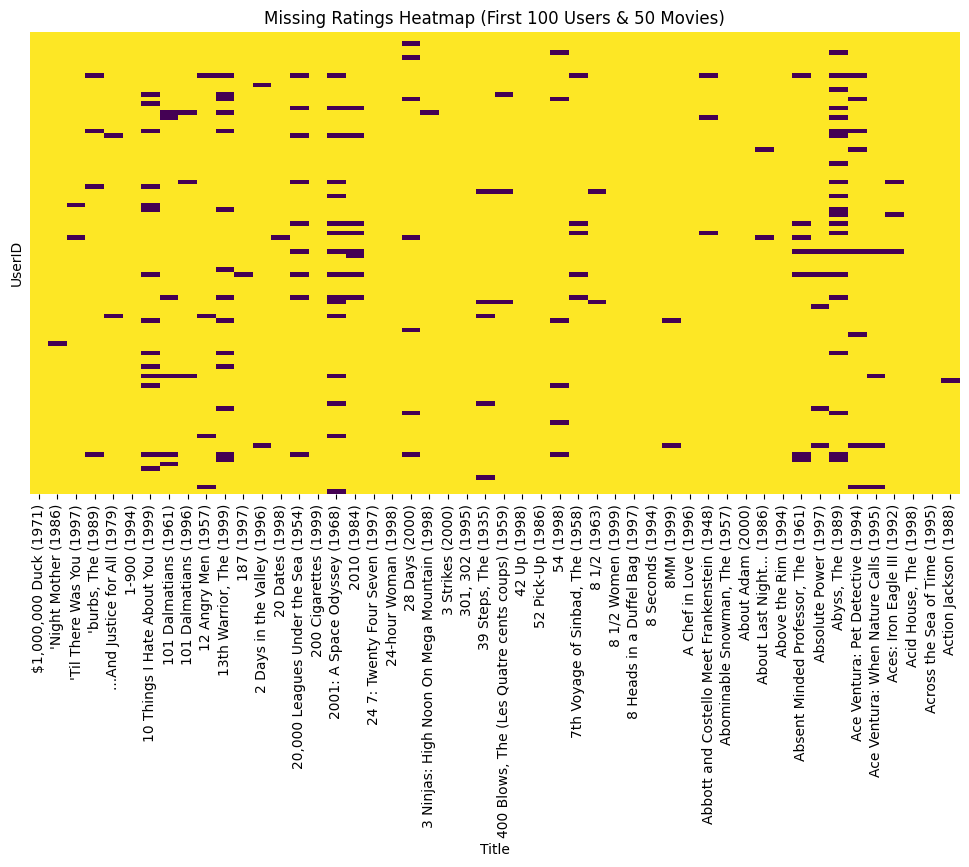

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(movie_ratings.iloc[:100, :50].isna(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Ratings Heatmap (First 100 Users & 50 Movies)")
plt.show()


Yellow heatmap with scattered purple dots (indicating ratings).<br>

A few vertical dark bands → Popular movies rated by many users.<br>

A few horizontal dark bands → Active users who have rated many movies.<br>

Most movies and users will have randomly distributed missing values, confirming the dataset is sparse.

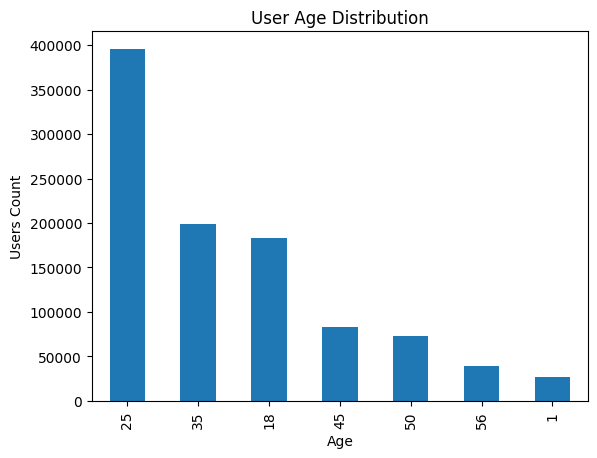

In [12]:
dfMaster['Age'].value_counts().plot(kind='bar')
plt.xlabel("Age")
plt.title("User Age Distribution")
plt.ylabel('Users Count')
plt.show()

In [13]:
dfMaster['Age'].value_counts()/ len(dfMaster) * 100

Age
25    39.547335
35    19.896142
18    18.349765
45     8.361552
50     7.247485
56     3.877190
1      2.720531
Name: count, dtype: float64

Observations
​
Here we can see thet 20% users are below 25 yrs of age.
Age group 25-34 contains around 40% of users.
90% users are below 50 yrs of age.


In [62]:
top10=dfMaster.groupby('Title').size().sort_values(ascending=False)[:10]
print(top10)
# top10.plot(kind='barh',alpha=0.6,figsize=(7,7))
# plt.xlabel("Users Ratings Count")
# plt.ylabel("Movies (Top 10)")
# plt.title("Top 10 movies by User rating")
# plt.show()

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
dtype: int64


The movie with maximum no. of ratings is American Beauty.


In [15]:
top5profession=dfMaster.groupby('Occupation').size().sort_values(ascending=False)[:5]
top5profession
# top5profession.plot(kind='barh',alpha=0.6,figsize=(7,7))
# plt.xlabel("Users Ratings Count")
# plt.ylabel("Movies (Top 25)")
# plt.title("Top 25 movies by User rating")
# plt.show()

Occupation
4     131032
0     130499
7     105425
1      85351
17     72816
dtype: int64

Observation 
​
1)college/grad student watch the most number of movies 
2)Other category people stand next to college grads

In [16]:
topGender=dfMaster.groupby('Gender').size().sort_values(ascending=False)[:5]
topGender

Gender
M    753769
F    246440
dtype: int64

Observation 
​
Most of rating is given Male

In [17]:
dfMaster['Timestamp'] = pd.to_datetime(dfMaster['Timestamp'], unit='s')
dfMaster['Year'] = dfMaster['Timestamp'].dt.year
dfMaster.drop(columns='Timestamp',inplace=True)


In [18]:
dfMaster

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation,Zip-code,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10,48067,2001
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,F,1,10,48067,2001
2,150,Apollo 13 (1995),Drama,1,5,F,1,10,48067,2000
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,F,1,10,48067,2000
4,527,Schindler's List (1993),Drama|War,1,5,F,1,10,48067,2001
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,M,25,4,92843,2000
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,M,25,4,92843,2000
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,M,25,4,92843,2000
1000207,3555,U-571 (2000),Action|Thriller,5727,3,M,25,4,92843,2000


In [19]:
dfMaster['Year'].value_counts()

Year
2000    904757
2001     68058
2002     24046
2003      3348
Name: count, dtype: int64

Observation

2000 Year as highest Rating

# Analysis


## Sparsity:
- **Sparsity:** 95.53%
- **Interpretation:** The dataset is highly sparse, with only about 4.47% of the possible user-movie pairs having ratings.

## Use Case:
- **Goal 1:** Recommend new movies to users.
  - **Recommendation:** Item-based collaborative filtering might be more effective because it focuses on similarities between movies.
- **Goal 2:** Personalize recommendations based on user behavior.
  - **Recommendation:** User-based collaborative filtering could be useful, but the high sparsity might make it less reliable.

# Decision
Given the dataset characteristics:

## High Sparsity (95.53%):
- **Preference:** Item-based collaborative filtering tends to perform better in sparse datasets because item similarities are more stable than user similarities.

## Number of Users > Number of Movies:
- **Observation:** While the number of users is larger than the number of movies, the difference is not extreme. However, item-based filtering is still preferred due to the high sparsity.

## Use Case:
- **Goal:** Recommend movies (items).
  - **Recommendation:** Item-based filtering is more suitable.


## Why Item-Based Collaborative Filtering?
### Stability:
- **Reason:** Item similarities are less affected by sparsity compared to user similarities.
- **Observation:** Movies tend to have more consistent ratings over time, while user preferences can change frequently.

### Scalability:
- **Reason:** With 3,706 movies, computing item similarities is computationally efficient.
- **Comparison:** User-based filtering would require computing similarities between 6,040 users, which is more computationally expensive.

### Performance:
- **Reason:** Item-based filtering often performs better in sparse datasets because it relies on fewer, more reliable relationships (item-item similarities).

In [24]:
movie_ratings = dfMaster.pivot_table(index='UserID', columns='Title', values='Rating')
movie_ratings_filled = movie_ratings.fillna(0)  # Convert NaN to 0 (or you can use mean ratings)

In [25]:
# Check sparsity
print(f"Total ratings: {movie_ratings_filled.stack().count()}")
print(f"Total users: {len(movie_ratings_filled.index)}")
print(f"Total movies: {len(movie_ratings_filled.columns)}")
print(f"Sparsity: {1 - (movie_ratings_filled.stack().count() / (len(movie_ratings_filled.index) * len(movie_ratings_filled.columns)))}")

Total ratings: 22384240
Total users: 6040
Total movies: 3706
Sparsity: 0.0


### Item-Based Collaborative Filtering (Similarity between Movies)


In [30]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute similarity based on movies
movie_similarity = cosine_similarity(movie_ratings_filled.T)  # Transpose to get movies as rows
movie_similarity_df = pd.DataFrame(movie_similarity, index=movie_ratings_filled.columns, columns=movie_ratings_filled.columns)

def get_similar_movies(movie_name, top_n=5):
    if movie_name in movie_similarity_df.index:
        similar_movies = movie_similarity_df[movie_name].sort_values(ascending=False)[1:top_n+1]  # Exclude itself
        return similar_movies
    else:
        return "Movie not found in dataset"

# Example
print(get_similar_movies("Liar Liar (1997)", top_n=5))

Title
Mrs. Doubtfire (1993)                0.557067
Ace Ventura: Pet Detective (1994)    0.516861
Dumb & Dumber (1994)                 0.512585
Home Alone (1990)                    0.511204
Wayne's World (1992)                 0.499368
Name: Liar Liar (1997), dtype: float64


Using Pairwise to find out the similar movies

In [38]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating a pivot table of movie titles & user id and imputing the NaN values
movie_ratings = dfMaster.pivot_table(index='UserID', columns='Title', values='Rating', fill_value=0)

# Calculate the Pearson Correlation
item_correlation = 1 - pairwise_distances(movie_ratings.T, metric='correlation')

# Convert the NumPy array to a Pandas DataFrame
item_correlation_df = pd.DataFrame(item_correlation, columns=movie_ratings.columns, index=movie_ratings.columns)

# Write the DataFrame to a CSV file
item_correlation_df.to_csv('item_correlation.csv')

# Function to get top N similar movies based on Pearson Correlation
def get_top_similar_movies(movie_title, n=5):
    movie_idx = movie_ratings.columns.get_loc(movie_title)
    similar_scores = item_correlation[movie_idx]
    top_similar_movies = np.argsort(similar_scores)[::-1][:n]
    return movie_ratings.columns[top_similar_movies]

# Example: Get top 5 movies similar to 'Liar Liar (1997)'
movie_title = 'Liar Liar (1997)'
top_similar_movies_pearson = get_top_similar_movies(movie_title, n=5)
    
print(f"\nTop 5 movies similar to '{movie_title}':")
print(top_similar_movies_pearson)


Top 5 movies similar to 'Liar Liar (1997)':
Index(['Liar Liar (1997)', 'Mrs. Doubtfire (1993)', 'Dumb & Dumber (1994)',
       'Ace Ventura: Pet Detective (1994)', 'Home Alone (1990)'],
      dtype='object', name='Title')


Nearest Neighbors model

In [ ]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

# Creating a pivot table of movie titles & user id and imputing the NaN values
movie_ratings = dfMaster.pivot_table(index='UserID', columns='Title', values='Rating', fill_value=0)

# Create a Nearest Neighbors model
nn_model = NearestNeighbors(metric='cosine', algorithm='brute')
nn_model.fit(movie_ratings.T)  # Fit the model on the transposed pivot table (movies as rows)

# Function to get top N similar movies using Nearest Neighbors
def get_top_similar_movies_nn(movie_title, n=5):
    # Get the index of the movie
    movie_idx = movie_ratings.columns.get_loc(movie_title)
    
    # Find the nearest neighbors
    _, indices = nn_model.kneighbors([movie_ratings.T.iloc[movie_idx]], n_neighbors=n+1)
    
    # Extract the top-N similar movies (excluding the movie itself)
    top_similar_movies = movie_ratings.columns[indices.flatten()][1:]
    
    return top_similar_movies

# Example: Get top 5 movies similar to 'Liar Liar (1997)' using Nearest Neighbors
movie_title = 'Liar Liar (1997)'
top_similar_movies_nn = get_top_similar_movies_nn(movie_title, n=5)

print(f"\nTop 5 movies similar to '{movie_title}' using Nearest Neighbors:")
print(top_similar_movies_nn)

### User-Based Collaborative Filtering (Find Similar Users)

In [27]:
user_similarity = cosine_similarity(movie_ratings_filled)

user_similarity_df = pd.DataFrame(user_similarity, index=movie_ratings_filled.index, columns=movie_ratings_filled.index)


def get_similar_users(user_id, top_n=5):
    if user_id in user_similarity_df.index:
        similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:top_n+1]
        return similar_users
    else:
        return "User not found in dataset"

# Example
print(get_similar_users(5705, top_n=5))

UserID
2873    0.463022
92      0.430985
4086    0.430117
541     0.428328
1112    0.426438
Name: 5705, dtype: float64


In [28]:
def recommend_movies_for_user(user_id, top_n=5):
    if user_id not in movie_ratings_filled.index:
        return ['No such User']  # Return an empty list if the user is not found
    
    # Step 1: Check User's Ratings
    user_ratings = movie_ratings_filled.loc[user_id] #Return a series of Movies 
    rated_movies = user_ratings[user_ratings > 0]  # Consider only rated movies, ignore zeroes

    # Step 2: Get top similar users
    similar_users = get_similar_users(user_id, top_n=5)
    if isinstance(similar_users, str):  # If no similar users found
        return ["no similar users are found"]  # Return an empty list if no similar users are found

    # Step 3: Get ratings from similar users
    similar_users_ratings = movie_ratings_filled.loc[similar_users.index]

    # Step 4: Compute average ratings
    avg_movie_ratings = similar_users_ratings.mean().sort_values(ascending=False)#Return a series of Movies with average raings

    # Step 5: Get movies the target user has already watched
    watched_movies = rated_movies.index  # Only non-zero rated movies

    # Step 6: Filter out movies the user has already rated
    unseen_movies = avg_movie_ratings.drop(watched_movies, errors='ignore')

    # If there are no recommendations, suggest random unseen movies
    if unseen_movies.empty:
        unseen_movies = movie_ratings_filled.columns.difference(watched_movies)
        if len(unseen_movies) > 0:
            random_movies = np.random.choice(unseen_movies, min(top_n, len(unseen_movies)), replace=False)
            return list(random_movies)
        else:
            return []  # Return an empty list if no unseen movies are available

    return unseen_movies.head(top_n).index.tolist()  # Return the top-N recommended movies

print(recommend_movies_for_user(5705, top_n=5))

['Sixth Sense, The (1999)', 'Braveheart (1995)', 'Green Mile, The (1999)', 'Ever After: A Cinderella Story (1998)', 'Galaxy Quest (1999)']


### Content-based filtering

In [33]:
dfGenres = dfMaster[['Title', 'Genres']].drop_duplicates()
dfGenres['Genres'] = dfGenres['Genres'].str.split('|')  # Convert to list

# Explode to create a row for each genre
dfGenres = dfGenres.explode('Genres')

# Step 2: Create a pivot table with binary genre columns
dfGenresPivot = dfGenres.pivot_table(index='Title', columns='Genres', aggfunc='size', fill_value=0).fillna(0)

# Step 3: Create the Ratings Pivot Table
movie_ratings = dfMaster.pivot_table(index='UserID', columns='Title', values='Rating').fillna(0)

# Step 4: Merge the genre-based pivot table with the ratings table
dfMovieData = dfGenresPivot.merge(movie_ratings.T, left_index=True, right_index=True, how='left')



In [34]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute similarity using genre-based data
movie_similarity = cosine_similarity(dfMovieData)

# Convert into DataFrame
movie_similarity_df = pd.DataFrame(movie_similarity, index=dfMovieData.index, columns=dfMovieData.index)

print(movie_similarity_df['Liar Liar (1997)'].sort_values(ascending=False))


Title
Liar Liar (1997)                         1.000000
Mrs. Doubtfire (1993)                    0.557112
Ace Ventura: Pet Detective (1994)        0.516917
Dumb & Dumber (1994)                     0.512643
Home Alone (1990)                        0.511141
                                           ...   
Tarantella (1995)                        0.000000
Brown's Requiem (1998)                   0.000000
Vampyros Lesbos (Las Vampiras) (1970)    0.000000
Detroit 9000 (1973)                      0.000000
An Unforgettable Summer (1994)           0.000000
Name: Liar Liar (1997), Length: 3706, dtype: float64


### HYBRID RECOMMENDATION

In [35]:
import numpy as np

def hybrid_recommendation(user_id, top_n=5):
    # Step 1: Collaborative Filtering (User-Based)
    user_ratings = movie_ratings.loc[user_id]  # Get ratings for the target user
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:]  # Exclude the user itself
    similar_users_ratings = movie_ratings.loc[similar_users.index]
    avg_movie_ratings = similar_users_ratings.mean().sort_values(ascending=False)
    
    # Step 2: Get movies the user has already rated
    watched_movies = user_ratings[user_ratings > 0].index  # Movies rated by the user
    unseen_movies = avg_movie_ratings.drop(watched_movies, errors='ignore')  # Unseen movies by the user

    # Step 3: Content-Based Filtering (Movie Similarity using Genres)
    if not watched_movies.empty:
        # Get similarity scores for all movies based on watched movies
        similar_movies_scores = movie_similarity_df.loc[watched_movies].mean().sort_values(ascending=False)
        
        # Remove already watched movies
        similar_movies_scores = similar_movies_scores.drop(watched_movies, errors='ignore')

        # Get top recommended movies
        content_based_recommendations = similar_movies_scores.head(top_n).index.tolist()
    else:
        content_based_recommendations = []

    # Step 4: Combine content-based and collaborative recommendations
    final_recommendations = list(set(unseen_movies.head(top_n).index.tolist() + content_based_recommendations[:top_n]))

    # If no recommendations found, suggest random unseen movies
    if not final_recommendations:
        unseen_movies_list = movie_ratings.columns.difference(watched_movies)
        random_movies = np.random.choice(unseen_movies_list, min(top_n, len(unseen_movies_list)), replace=False)
        return list(random_movies)

    return final_recommendations

# Example usage for a user with ID 1
recommended_movies = hybrid_recommendation(user_id=1, top_n=5)
print("Recommended Movies:", recommended_movies)


Recommended Movies: ['Lion King, The (1994)', 'Star Wars: Episode VI - Return of the Jedi (1983)', 'American Beauty (1999)', 'Star Wars: Episode V - The Empire Strikes Back (1980)', 'Silence of the Lambs, The (1991)', 'Shawshank Redemption, The (1994)', 'Raiders of the Lost Ark (1981)', 'Groundhog Day (1993)']


In [42]:
from surprise import Dataset, Reader
from surprise import KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

# User-Based Collaborative Filtering
def user_based_collaborative_filtering(dfMaster):
    reader = Reader(rating_scale=(1, 5))  # assuming ratings between 1 and 5
    data = Dataset.load_from_df(dfMaster[['UserID', 'Title', 'Rating']], reader)

    # Split the data into train and test sets (80% train, 20% test)
    trainset, testset = train_test_split(data, test_size=0.2)

    # Set up KNN model with user-based similarity (cosine similarity)
    sim_options = {'name': 'cosine', 'user_based': True}  # User-User similarity
    model = KNNBasic(sim_options=sim_options)

    # Train the model
    model.fit(trainset)

    # Make predictions on the testset
    predictions = model.test(testset)

    # Calculate RMSE and MAE
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)
    mape = mae / 5.0 * 100 


    # Get top-N recommendations
    top_n = get_top_n(predictions, n=5)
    
    return top_n, rmse, mae,mape

# Function to get the top N recommendations for each user
def get_top_n(predictions, n=5):
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if uid not in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# Example usage
top_n_user, rmse_user, mae_user,mape_user = user_based_collaborative_filtering(dfMaster)
print("Top-N recommendations for User-Based Collaborative Filtering:", top_n_user)
print(f"RMSE: {rmse_user:.4f}, MAE: {mae_user:.4f}, MAPE: {mape_user:.4f}")


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9767
MAE:  0.7717
Top-N recommendations for User-Based Collaborative Filtering: {3811: [('Cool Hand Luke (1967)', 4.60011925831712), ("Ferris Bueller's Day Off (1986)", 4.550057909191918), ('Raiders of the Lost Ark (1981)', 4.425), ('Star Wars: Episode IV - A New Hope (1977)', 4.425), ("One Flew Over the Cuckoo's Nest (1975)", 4.3)], 1675: [('Exorcist, The (1973)', 4.35030676662343), ('Beauty and the Beast (1991)', 4.2504953407573), ('Willy Wonka and the Chocolate Factory (1971)', 4.150894835298258), ('Star Trek: First Contact (1996)', 4.150429886156764), ('Winnie the Pooh and the Blustery Day (1968)', 4.149487116975181)], 4150: [('Shawshank Redemption, The (1994)', 4.749946596888535), ('On the Waterfront (1954)', 4.5249227477213605), ('Ben-Hur (1959)', 4.500326966268517), ('Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)', 4.450232818972157), ('Blade Runner (1982)', 4.424736

In [44]:
# Item-Based Collaborative Filtering
def item_based_collaborative_filtering(dfMaster):
    reader = Reader(rating_scale=(1, 5))
    data = Dataset.load_from_df(dfMaster[['UserID', 'Title', 'Rating']], reader)

    # Split the data into train and test sets (80% train, 20% test)
    trainset, testset = train_test_split(data, test_size=0.2)

    # Set up KNN model with item-based similarity (cosine similarity)
    sim_options = {'name': 'cosine', 'user_based': False}  # Item-Item similarity
    model = KNNBasic(sim_options=sim_options)

    # Train the model
    model.fit(trainset)

    # Make predictions on the testset
    predictions = model.test(testset)

    # Calculate RMSE and MAE
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)
    mape = mae / 5.0 * 100 


    # Get top-N recommendations
    top_n = get_top_n(predictions, n=5)
    
    return top_n, rmse, mae,mape

# Example usage
top_n_item, rmse_item, mae_item,mape_user = item_based_collaborative_filtering(dfMaster)
print("Top-N recommendations for Item-Based Collaborative Filtering:", top_n_item)
print(f"RMSE: {rmse_item:.4f}, MAE: {mae_item:.4f}, MAPE: {mape_user:.4f}")


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9986
MAE:  0.7795
Top-N recommendations for Item-Based Collaborative Filtering: {3808: [('Blues Brothers, The (1980)', 4.374809739464918), ('Matrix, The (1999)', 4.3250294043368), ('Ghostbusters (1984)', 4.100597045515851), ('Alien (1979)', 3.925262231708227), ("Ferris Bueller's Day Off (1986)", 3.922220893959579)], 2146: [('Hidden, The (1987)', 3.6500902071905776), ('Rocky (1976)', 3.6270454181064915), ('Boat, The (Das Boot) (1981)', 3.6011681597120315), ('Predator (1987)', 3.5759857807286877), ('Buffalo 66 (1998)', 3.5758626274924583)], 3217: [('Broadcast News (1987)', 4.5012234961049185), ('Full Monty, The (1997)', 4.476112073527758), ('Roman Holiday (1953)', 4.450419573956749), ('Year of Living Dangerously (1982)', 4.426651046740494), ('Godfather: Part II, The (1974)', 4.375144448051743)], 780: [('Groundhog Day (1993)', 4.150226073982525), ('Twelve Monkeys (1995)', 4.075297066026175), ('Matrix, The 

In [68]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy
import matplotlib.pyplot as plt
import seaborn as sns



# Define a Reader object
reader = Reader(rating_scale=(1, 5))

# Load the data into the Surprise Dataset
data = Dataset.load_from_df(dfMaster[['UserID', 'Title', 'Rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Create and train the SVD model
model = SVD()
model.fit(trainset)

# Make predictions on the test set
predictions = model.test(testset)

# Evaluate the model using RMSE and MAPE
rmse = accuracy.rmse(predictions)
mae_value = accuracy.mae(predictions)
mape = mae_value / 5.0 * 100 

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")


liar_liar_internal_id = trainset.to_inner_iid('Liar Liar (1997)')

# Get the latent factors for 'Liar Liar (1997)'
liar_liar_embedding = model.qi[liar_liar_internal_id]

# Find movies similar to 'Liar Liar' based on embeddings
similar_movies_indices = (model.qi @ liar_liar_embedding.T).argsort(axis=0)[::-1].flatten()

# Print the top 5 movies similar to 'Liar Liar'
top_similar_movies = dfMaster['Title'].iloc[similar_movies_indices[1:6]]
print("\nTop 5 movies similar to 'Liar Liar (1997)' based on embeddings:")
print(top_similar_movies)

RMSE: 0.8753
MAE:  0.6873
Root Mean Squared Error (RMSE): 0.8753499629703873
Mean Absolute Percentage Error (MAPE): 13.746726792931169

Top 5 movies similar to 'Liar Liar (1997)' based on embeddings:
1201         Lethal Weapon 2 (1989)
997     Prince of Egypt, The (1998)
935       Driving Miss Daisy (1989)
1446      Lawrence of Arabia (1962)
718          Man on the Moon (1999)
Name: Title, dtype: object
